In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Loading the matrix from /home/asaberi/laminar_organization/code/../output/distance/geodesic_distance_matrix_parc-schaefer1000_approach-center-to-center.npz


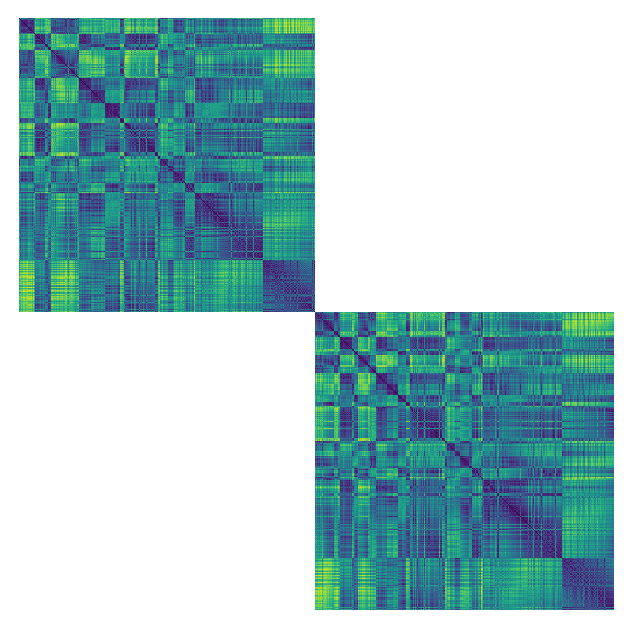

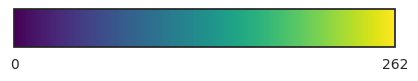

In [2]:
gd = matrices.DistanceMatrix('schaefer1000', kind='geodesic', exc_regions='adysgranular')
gd.plot(vrange=(0, 1))

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


R2 = 0.1591555287794737, p = 0.004


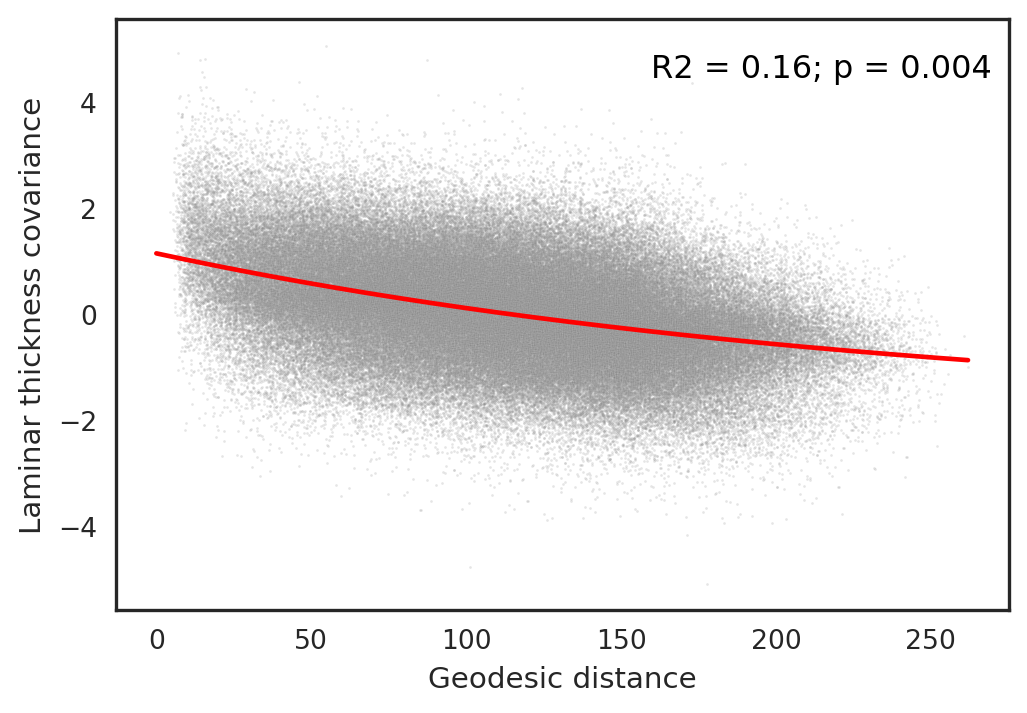

In [3]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer1000')
sns.set_style('white')
r2, p = gd.regress_out(ltc, spin_test=True, return_r2=True)
print(f'R2 = {r2}, p = {p}')

In [4]:
ltc_gd_reg_out = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer1000', regress_out_geodesic_distance=True)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_reg_out_gd_exc-adysgranular_metric-parcor/matrix.npz


In [5]:
ltcg_gd_reg_out = surfaces.MicrostructuralCovarianceGradients(ltc_gd_reg_out, n_components_report=1)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


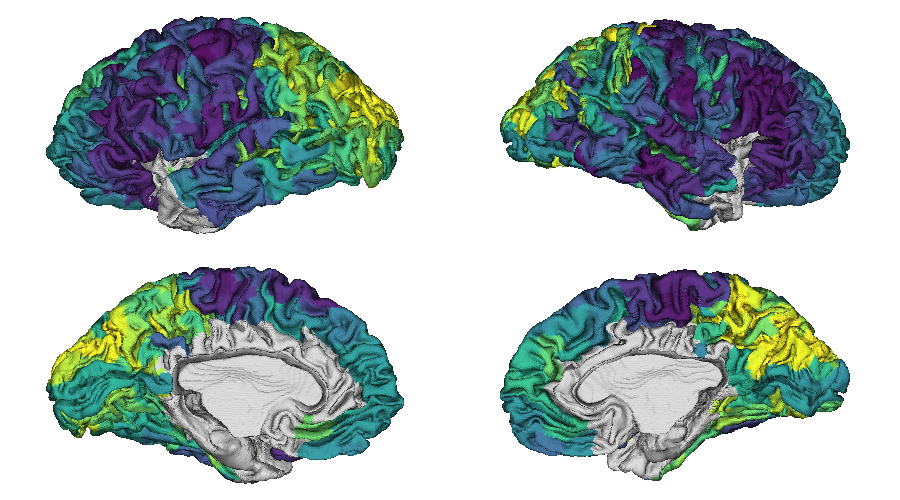

In [6]:
helpers.plot_surface(helpers.deparcellate(ltcg_gd_reg_out.parcellated_data['LTC G1'], 'schaefer1000'),
                    layout_style='grid', inflate=False, plot_downsampled=False)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-889.npz and have the same parcels


(          LTC G1
 LTC G1  0.973624,
         LTC G1
 LTC G1     0.0)

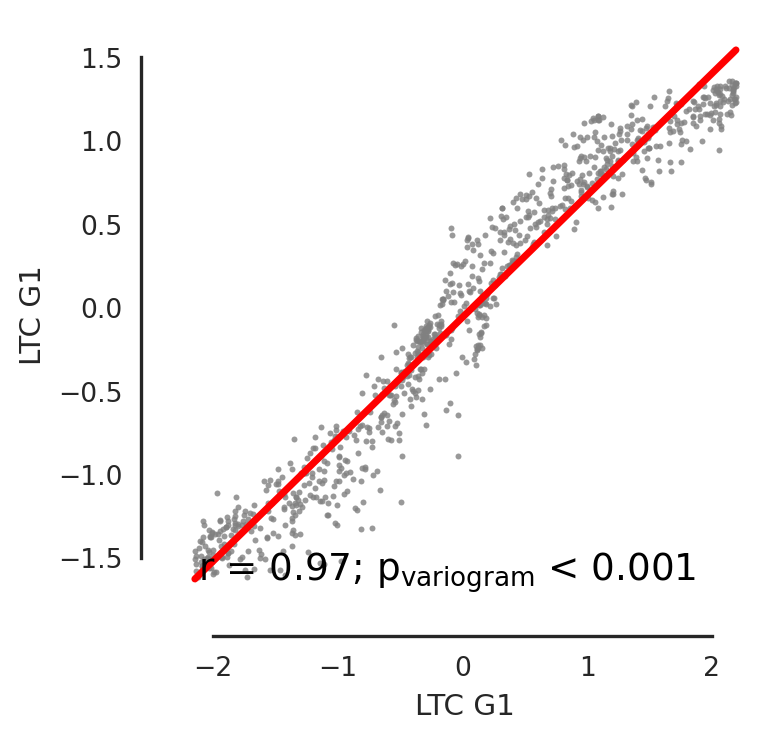

In [7]:
ltcg = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer1000'))
ltcg.correlate(ltcg_gd_reg_out, n_perm=1000, x_columns=['LTC G1'], y_columns=['LTC G1'], axis_off=False)